# Exercise 1 Answers

First, we load the spextrum into pyspex and plot it.

## Loading spectrum and plot

In [1]:
# Loading the pyspex module
from pyspex.spex import Session
s=Session()

 Welcome jellep to SPEX version 3.07.03

 NEW in this version of SPEX: 
01-12-2022 Fixed issue with plot cap command
05-12-2022 Fixed issue with knak model
22-03-2023 Fixed issue with treatment of bad quality bins in trafo
23-03-2023 Fixed small issues in the pyspex interface

 Currently using SPEXACT version 2.07.00. Type `help var calc` for details.


In [2]:
# Read the data files
s.data("powerl.res","powerl.spo")

0

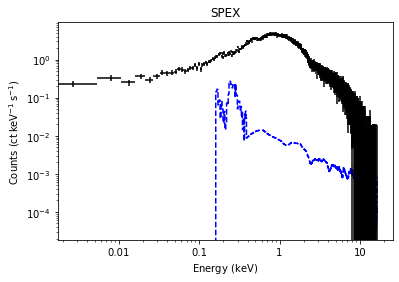

In [3]:
# Plot the spectrum
s.plot_data(xlog=True, ylog=True)

## Ignoring parts of the spectrum and binning

To fit the spectrum between 0.3 and 10 keV, we need to ignore the parts of the spectrum below 0.3 keV and above 10 keV. This needs two ignore commands:

In [4]:
s.ignore(1,1,0.0,0.3,'kev')
s.ignore(1,1,10.0,1000.,'keV')

The first and second '1' in the ignore command stand for instrument #1 and region #1, which tells SPEX which spectrum you want to apply your commands to in case you load multiple spectra. A .res and .spo file can contain multiple spectra. Spectra within .res and .spo files are called regions. Spectra from different .res and .spo files will get a different instrument number.

In [5]:
# The remaining part of the spectrum can be binned by the obin command:
s.obin(1,1,0.3,10.,'kev')

## Set up the model and distance

In [6]:
import numpy
s.com('absm')
s.com('pow')
s.com_rel(1,2,numpy.array([1]))
s.dist(1,6,'kpc')

 You have defined    1 component.
 You have defined    2 components.


 Distances assuming H0 =  70.0 km/s/Mpc, Omega_m = 0.300 Omega_Lambda = 0.700 Omega_r = 0.000
Sector       m      A.U.        ly        pc       kpc       Mpc  redshift        cz   age(yr)
----------------------------------------------------------------------------------------------
   1 1.851E+20 1.238E+09 1.957E+04 6000.0000    6.0000 6.000E-03    0.0000       0.4 1.957E+04
----------------------------------------------------------------------------------------------



## Fit the model

Before you fit the model with the `s.fit()` command, check whether the parameters of your model are reasonable compared to your spectrum:

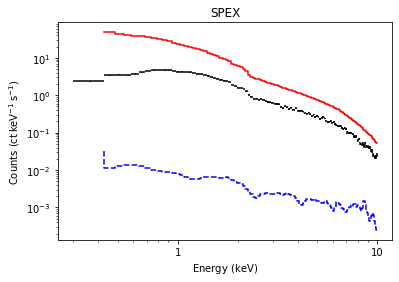

In [7]:
s.calc()
s.plot_data(xlog=True,ylog=True)

In [8]:
s.fit()

 fit iter  100                                                   
  1.046643E+06          4  1.000E-04   1.00       2.00
 You cannot plot this frame since nothing is defined
 
   289755.              9  5.996E-04  0.602       1.99
 You cannot plot this frame since nothing is defined
 
   60246.8             13  9.329E-04  0.114       1.79
 You cannot plot this frame since nothing is defined
 
   4113.83             17  1.467E-03  0.212       1.76
 You cannot plot this frame since nothing is defined
 
   130.572             21  1.414E-03  0.246       1.77
 You cannot plot this frame since nothing is defined
 
   122.419             25  1.418E-03  0.248       1.77
 You cannot plot this frame since nothing is defined
 
--------------------------------------------------------------------------------------------------
sect comp mod  acro parameter with unit     value      status    minimum   maximum lsec lcom lpar

   1    1 absm nh   Column (1E28/m**2)   1.4176896E-03 thawn     0.0  

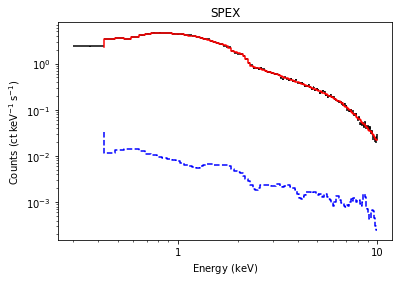

In [9]:
s.plot_data(xlog=True,ylog=True)

## Calculating errors

The fit looks great! Let's calculate the errors on the Galactic column density ('nh'), the normalization of the power law ('norm') and the slope of the power law ('gamm'):

In [11]:
err_nh = s.error(1,1,'nh')
err_norm = s.error(1,2,'norm')
err_gamm = s.error(1,2,'gamm')

 Parameter        Statistics       Delta          Delta
   value            value        parameter      statistics
----------------------------------------------------------
  1.400771E-03      123.42     -1.691852E-05    1.00
  1.434608E-03      123.42      1.691852E-05    1.00
 Parameter   1    1 nh  :   1.41769E-03 Errors:  -1.69185E-05 ,   1.69185E-05
 Parameter        Statistics       Delta          Delta
   value            value        parameter      statistics
----------------------------------------------------------
  0.246443          123.43     -1.609012E-03    1.01
  0.246453          123.41     -1.598954E-03    0.99
  0.249661          123.41      1.609012E-03    0.99
  0.251270          126.36      3.218010E-03    3.94
  0.249661          123.41      1.609012E-03    0.99
  0.249677          123.43      1.625121E-03    1.01
 Parameter   1    2 norm:   0.24805     Errors:  -1.59895E-03 ,   1.62512E-03
 Parameter        Statistics       Delta          Delta
   value        

In [15]:
print(err_norm.value, err_norm.lerr, err_norm.uerr)

0.24805177748203278 -0.001598954200744629 0.0016251206398010254
